# 1.Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

In [1]:
import zipfile

#unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/sample_data/Dataset_images.zip")
zip_ref.extractall()
zip_ref.close()

## Understand the data

In [2]:
! ls Dataset_images

Train  Validation


In [3]:
! ls Dataset_images/Train/Bull

pic_01.jpeg  pic_03.jpeg  pic_05.jpeg  pic_07.jpeg
pic_02.jpeg  pic_04.jpeg  pic_06.jpeg  pic_08.jpeg


In [5]:
! ls Dataset_images/Train/Elephant

E_01.jpeg    pic_03.jpeg  pic_05.jpeg  pic_07.jpeg
pic_02.jpeg  pic_04.jpeg  pic_06.jpeg  pic_08.jpeg


In [8]:
!ls Dataset_images/Validation/Elephant 

pic_09.jpeg  pic_10.jpeg


In [9]:
import os

# list number of files in pizza_steak directory
for dirpath, dirnames, filenames in os.walk("Dataset_images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'Dataset_images'.
There are 2 directories and 1 images in 'Dataset_images/Train'.
There are 0 directories and 8 images in 'Dataset_images/Train/Elephant'.
There are 0 directories and 8 images in 'Dataset_images/Train/Bull'.
There are 2 directories and 1 images in 'Dataset_images/Validation'.
There are 0 directories and 2 images in 'Dataset_images/Validation/Elephant'.
There are 0 directories and 2 images in 'Dataset_images/Validation/Bull'.


## To visualize images, first get the class names programmatically

In [12]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("Dataset_images/Train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))#created a list of class names
print(class_names)

['.DS_Store' 'Bull' 'Elephant']


In [16]:
class_names=class_names[1:]

In [17]:
print(class_names)

['Bull' 'Elephant']


In [18]:
# Visualising the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir,target_class):
  #Setup the target directory 
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['pic_03.jpeg']
Image shape: (1000, 1500, 3)


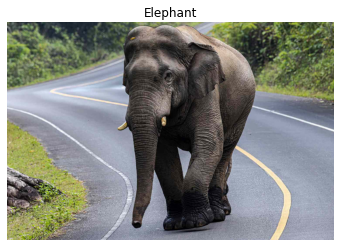

In [22]:
#View random image from training set
img =view_random_image(target_dir="Dataset_images/Train/",
                  target_class="Elephant")

['pic_06.jpeg']
Image shape: (768, 1024, 3)


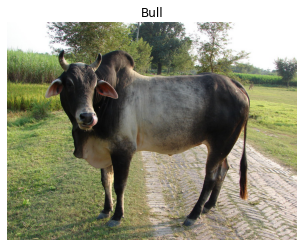

In [23]:
img =view_random_image(target_dir="Dataset_images/Train/",
                  target_class="Bull")

['pic_10.jpeg']
Image shape: (3840, 2880, 3)


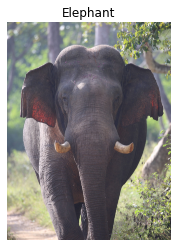

In [24]:
img =view_random_image(target_dir="Dataset_images/Validation/",
                  target_class="Elephant")

['pic_10.jpeg']
Image shape: (183, 276, 3)


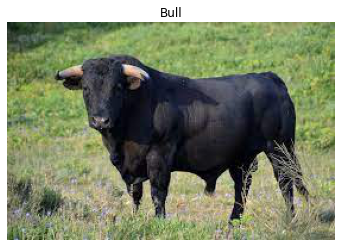

In [25]:
img =view_random_image(target_dir="Dataset_images/Validation/",
                  target_class="Bull")

## Preprocess the image

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)


#Preprocess data(get all pixel values between 0 and 1, also called scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
#Setup path to the data directories
train_dir ="/content/Dataset_images/Train"
test_dir = "/content/Dataset_images/Validation"

In [28]:
#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


## CNN model 

### model_0: Baseline model

In [31]:
#Build a CNN model
model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_0.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.7108 - accuracy: 0.4375 - val_loss: 6.2479 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 670ms/step - loss: 4.6719 - accuracy: 0.5000 - val_loss: 3.0934 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 691ms/step - loss: 1.7580 - accuracy: 0.5000 - val_loss: 1.9652 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 689ms/step - loss: 0.5644 - accuracy: 0.7500 - val_loss: 0.7002 - val_accuracy: 0.7500
Epoch 5/5
1/1 [==============================] - 1s 680ms/step - loss: 0.1979 - accuracy: 0.8750 - val_loss: 1.2567 - val_accuracy: 0.5000


In [32]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


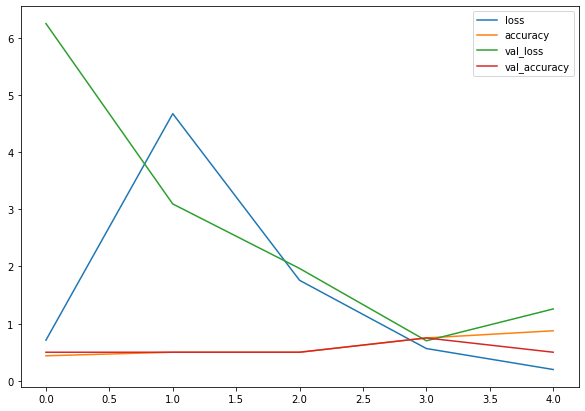

In [33]:
#Evaluate the model
#training curve
import pandas as pd
pd.DataFrame(history_0.history).plot(figsize=(10,7))

### Model_1 : adding pooling layer with 1 conv2D layer

In [35]:
#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),                       
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.7014 - accuracy: 0.4375 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.6763 - accuracy: 0.5000 - val_loss: 0.6759 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 685ms/step - loss: 0.6581 - accuracy: 0.5000 - val_loss: 0.6673 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 683ms/step - loss: 0.6394 - accuracy: 0.5000 - val_loss: 0.6557 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 668ms/step - loss: 0.6186 - accuracy: 0.6875 - val_loss: 0.6428 - val_accuracy: 0.7500


In [36]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

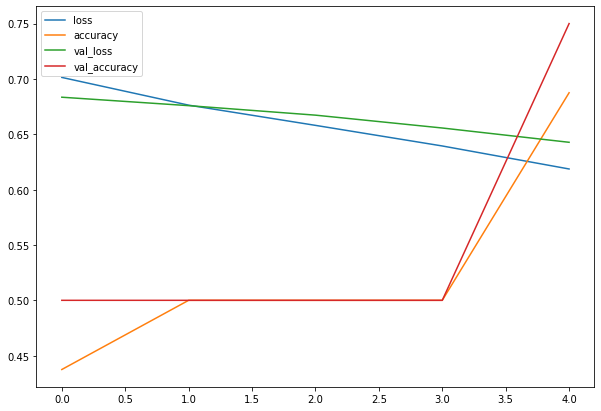

In [37]:
#training curve
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

### Model_2 : adding padding for the pooling layer as Valid and increasing the epochs from 5 to 10

In [45]:
#Build a CNN model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),                       
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6954 - accuracy: 0.4375 - val_loss: 0.6525 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 682ms/step - loss: 0.6569 - accuracy: 0.5000 - val_loss: 0.6365 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 1s 669ms/step - loss: 0.6177 - accuracy: 0.7500 - val_loss: 0.6177 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 658ms/step - loss: 0.5812 - accuracy: 0.9375 - val_loss: 0.5960 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 668ms/step - loss: 0.5400 - accuracy: 1.0000 - val_loss: 0.5665 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 677ms/step - loss: 0.4924 - accuracy: 0.9375 - val_loss: 0.5330 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 664ms/step - loss: 0.4425 - accuracy: 0.9375 - val_loss: 0.4994 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======

In [46]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 26, 26, 10)     

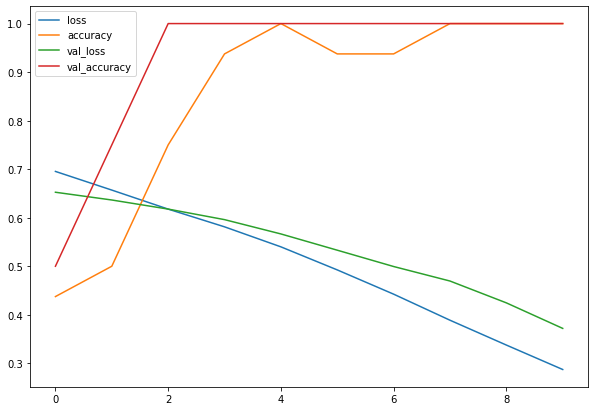

In [47]:
#training curve
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

### Making Prediction with our trained model on our own custom data

(-0.5, 611.5, 407.5, -0.5)

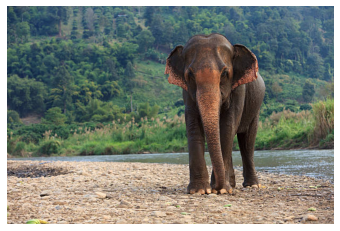

In [48]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

elephant = mpimg.imread("/content/sample_data/Pred_1.jpeg")
plt.imshow(elephant)
plt.axis(False)

In [49]:
#Create a function to import and image and resize it to be able to mbe used wit model
def load_and_prep_image(filename, img_shape=224):
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [50]:
#Load in and preprocess or custom image
elephant = load_and_prep_image("/content/sample_data/Pred_1.jpeg")
elephant

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.13235857, 0.21810786, 0.3124062 ],
        [0.21607642, 0.31350353, 0.33761004],
        [0.24112019, 0.34937662, 0.3043692 ],
        ...,
        [0.23343988, 0.38745967, 0.49947602],
        [0.21863024, 0.37076598, 0.47745377],
        [0.22830907, 0.3734071 , 0.48713258]],

       [[0.11368922, 0.19996373, 0.28910813],
        [0.22042504, 0.31960034, 0.3355161 ],
        [0.3212616 , 0.43106556, 0.37890092],
        ...,
        [0.26287776, 0.41761905, 0.5157343 ],
        [0.2453651 , 0.394836  , 0.4908094 ],
        [0.24301395, 0.38419044, 0.48250976]],

       [[0.14540567, 0.23507655, 0.30823454],
        [0.22893594, 0.3293211 , 0.33460197],
        [0.27065635, 0.3817558 , 0.31890693],
        ...,
        [0.3129196 , 0.4563715 , 0.5346286 ],
        [0.3305476 , 0.4721998 , 0.54599494],
        [0.29480347, 0.43163824, 0.50530773]],

       ...,

       [[0.7956655 , 0.7258612 , 0.6407709 ],
        [0.81

In [51]:
pred = model_2.predict(tf.expand_dims(elephant,axis=0))

1/1 [==============================] - 0s 154ms/step


In [52]:
#Index predicted class by rounding the prediction probability and indexing it on class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'Elephant'

In [53]:
def pred_and_plot(model,filename,class_names=class_names):
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 27ms/step


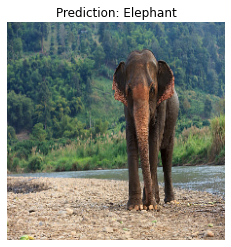

In [54]:
#Test model on custom image
pred_and_plot(model_2,"/content/sample_data/Pred_1.jpeg")

1/1 [==============================] - 0s 15ms/step


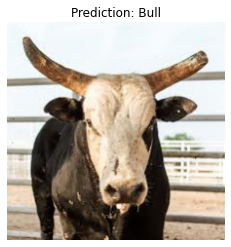

In [55]:
#Test model on custom image
pred_and_plot(model_2,"/content/sample_data/Pred_2.jpeg")

#2.Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [56]:
#set random seedd
tf.random.set_seed(42)

#1.Create model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),                       
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2. compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#3. create Learning rates call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


#4.Fit the model
find_lr_history=model_3.fit(train_data,
                              epochs=10,
                              validation_data=(valid_data),
                          callbacks=[lr_scheduler])

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7125 - accuracy: 0.5000 - val_loss: 0.6843 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
1/1 [==============================] - 1s 665ms/step - loss: 0.6855 - accuracy: 0.5000 - val_loss: 0.6784 - val_accuracy: 0.5000 - lr: 0.0011
Epoch 3/10
1/1 [==============================] - 1s 676ms/step - loss: 0.6694 - accuracy: 0.5000 - val_loss: 0.6724 - val_accuracy: 0.5000 - lr: 0.0013
Epoch 4/10
1/1 [==============================] - 1s 757ms/step - loss: 0.6484 - accuracy: 0.5000 - val_loss: 0.6617 - val_accuracy: 0.5000 - lr: 0.0014
Epoch 5/10
1/1 [==============================] - 1s 711ms/step - loss: 0.6212 - accuracy: 0.5000 - val_loss: 0.6471 - val_accuracy: 0.7500 - lr: 0.0016
Epoch 6/10
1/1 [==============================] - 1s 690ms/step - loss: 0.5865 - accuracy: 0.9375 - val_loss: 0.6335 - val_accuracy: 0.7500 - lr: 0.0018
Epoch 7/10
1/1 [==============================] - 1s 672ms/step - loss: 0.5477 - accu